,addiction_status,depression_score
0,nonaddict,66.297194
1,addict,66.344205
2,nonaddict,62.396513
3,nonaddict,54.621072
4,addict,65.315251
...,...,...
19364,addict,60.588558
19365,addict,58.466314
19366,addict,74.715285
19367,nonaddict,59.588651


no addicts = 6303
no nonaddicts =  13066
True Standardized Mean Difference: 0.5542469501501371



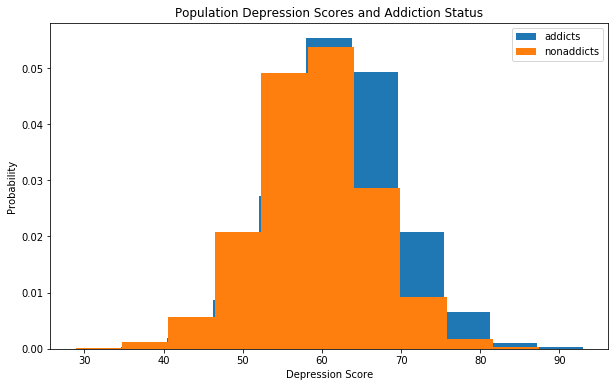

Study Summary Statistics:


,n_addicts,addict_mean,addict_sd,n_nonaddicts,nonaddict_mean,nonaddict_sd,smd,se_smd,lb,ub,weight
study ID,,,,,,,,,,,
0,62,65.337086,7.305223,117,58.636633,6.311528,1.000194,0.189786,0.628214,1.372175,27.763348
1,59,62.470559,7.675313,107,58.823092,6.881882,0.506204,0.186210,0.141232,0.871176,28.839828
2,56,61.624144,6.868809,119,57.406776,8.216118,0.537444,0.191558,0.161991,0.912897,27.252159
3,37,62.007750,7.836314,95,59.346803,7.799846,0.338742,0.232822,-0.117589,0.795074,18.448050
4,28,60.772052,7.827676,70,57.175566,7.433134,0.472864,0.268906,-0.054192,0.999919,13.829270
5,55,61.378164,6.212131,141,58.865980,6.791616,0.377138,0.191649,0.001507,0.752769,27.226317
6,12,62.482735,6.469251,28,59.743802,5.218391,0.478588,0.406056,-0.317282,1.274459,6.064953
7,49,62.350270,7.033457,97,60.155112,6.182325,0.337071,0.202413,-0.059659,0.733801,24.407385
8,64,63.180594,7.159565,130,58.944414,6.339266,0.637438,0.180536,0.283587,0.991288,30.681214


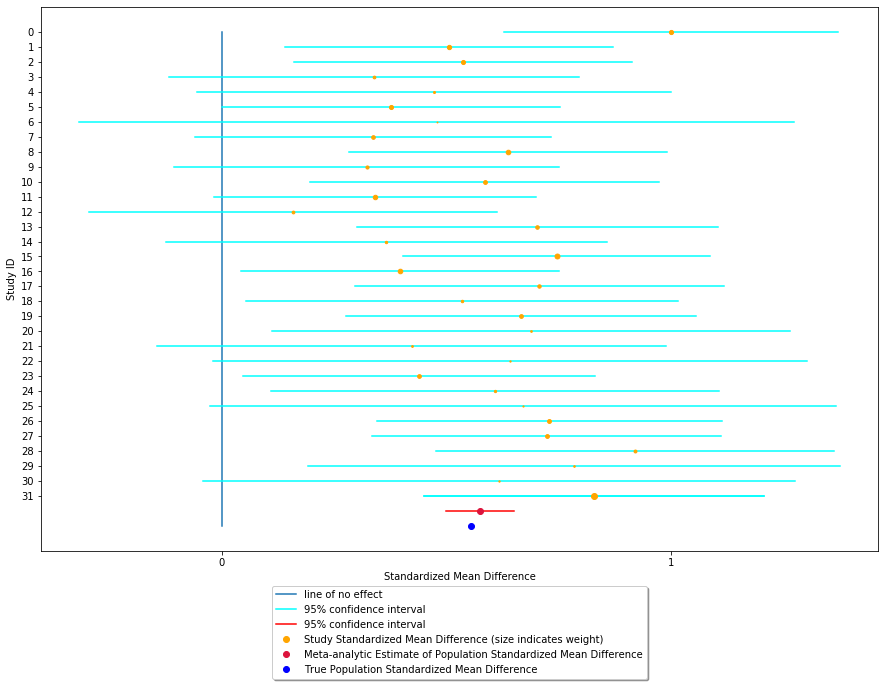

Z statistic of summary effect estimate =  14.838458009566008
p <  0.001


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# generating a population

pop_size = np.random.randint(8000,20000)

addiction = np.array([])

prev_addicted = np.random.uniform(low = 0.3, high = 0.6)

for i in np.arange(pop_size):
    addiction = np.append(addiction, np.random.choice(['addict','nonaddict'], p =[prev_addicted,1-prev_addicted]))
    
depression_scores = np.array([]) 

addict_depress_mean = np.random.randint(60,70)
nonaddict_depress_mean = np.random.randint(50,60)

for i in addiction: 
    if i == 'addict':
        depression_scores = np.append(depression_scores, np.random.normal(addict_depress_mean,np.random.randint(5,10)))
    if i == 'nonaddict':
        depression_scores = np.append(depression_scores, abs(np.random.normal(nonaddict_depress_mean,np.random.randint(5,10))))
    
df = pd.DataFrame()    
df['addiction_status'] = addiction
df['depression_score'] = depression_scores



display(df)


addicts = df[df['addiction_status'] == 'addict']
nonaddicts = df[df['addiction_status'] == 'nonaddict']

print('no addicts =', len(addicts))
print('no nonaddicts = ', len(nonaddicts))

n_addicts = len(addicts['depression_score'])
addicts_mean = np.mean(addicts['depression_score'])
addicts_sd = np.std(addicts['depression_score'], ddof = 1)
n_nonaddicts = len(nonaddicts['depression_score'])
nonaddicts_mean = np.mean(nonaddicts['depression_score'])
nonaddicts_sd = np.std(nonaddicts['depression_score'], ddof = 1)
pooled_sd = np.sqrt(((n_addicts-1)*addicts_sd**2 + (n_nonaddicts-1)*nonaddicts_sd**2) / (n_addicts+n_nonaddicts-2))
true_smd = (addicts_mean-nonaddicts_mean)/pooled_sd

print('True Standardized Mean Difference:', true_smd)
print()

plt.figure(figsize = (10,6))
plt.hist(addicts.iloc[:,1], density = True, label = 'addicts', )
plt.hist(nonaddicts.iloc[:,1], density = True, label = 'nonaddicts')
plt.xlabel('Depression Score')
plt.ylabel('Probability')
plt.title('Population Depression Scores and Addiction Status')
plt.legend()
plt.show()


# simulating the studies

no_of_studies = np.random.randint(5,40)


studies = []
study_dfs = []
for i in np.arange(no_of_studies):
    sample_size = np.random.randint(20,200)
    unit_loc = np.random.choice(list(np.arange(0,len(df)-1)), size = sample_size)
    sample = []
    for el in unit_loc:
        sample.append(df.iloc[el,:])
    df_study = pd.DataFrame(sample)
    study_dfs.append(df_study)
    

    
    
# calculating the study summary statistics


summary_stats = []

def var_d_func(n1,n2,smd):
    temp = (n1+n2)/(n1*n2) + smd**2/(2*(n1+n2))
    
    return temp
    
def j_func(df):
    
    temp = 1 - 3/(4*df-1)
    
    return temp


for i in np.arange(len(study_dfs)): 
   
    temp_df = study_dfs[i]
    temp_addicts = temp_df[temp_df['addiction_status'] == 'addict']
    n_addicts = len(temp_addicts)
    addict_temp_depression_score = temp_addicts['depression_score']
    addict_mean = np.mean(addict_temp_depression_score)
    addict_sd = np.std(addict_temp_depression_score,ddof = 1)
    temp_nonaddicts = temp_df[temp_df['addiction_status'] == 'nonaddict']
    n_nonaddicts = len(temp_nonaddicts)
    nonaddict_temp_depression_score = temp_nonaddicts['depression_score']
    nonaddict_mean = np.mean(nonaddict_temp_depression_score)
    nonaddict_sd = np.std(nonaddict_temp_depression_score,ddof = 1)
    pooled_sd = np.sqrt((((n_addicts-1)*addict_sd**2)+ ((n_nonaddicts-1)*nonaddict_sd**2))/(n_addicts+n_nonaddicts-2))
    d = (addict_mean-nonaddict_mean)/pooled_sd
    vard = var_d_func(n_addicts,n_addicts,d)
    j_correct = j_func((n_addicts+n_nonaddicts-2))
    smd = d*j_correct
    var_smd = j_correct**2 * vard
    se_smd = np.sqrt(var_smd)
    ub = smd + 1.96 * se_smd
    lb = smd - 1.96 * se_smd
    weight = 1/var_smd
    
    summary_stats.append([n_addicts,addict_mean, addict_sd,n_nonaddicts, nonaddict_mean,nonaddict_sd,
                          smd,se_smd, lb,ub, weight])


summary = pd.DataFrame(summary_stats, columns = ['n_addicts','addict_mean','addict_sd',
                             'n_nonaddicts','nonaddict_mean', 'nonaddict_sd','smd', 'se_smd', 'lb', 'ub','weight'])

summary.index.name = 'study ID'

summary.fillna(0, inplace=True)

print('Study Summary Statistics:')
display(summary)


# calculating the fixed effect meta-analysis statistics

effect_sizes = summary['smd']
weights = summary['weight']
sum_of_weights = np.sum(weights)

effect_size_times_weight = []

counter = 0
for i in np.arange(len(effect_sizes)):
    effect_size_times_weight.append(effect_sizes[counter]*weights[counter])
    counter = counter+1

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean



# standardizing the weights for the purpose of graphical display

stndrd_weights = summary['weight']/np.sum(summary['weight']) * 100


# creating a forest plot

y = []
zeros = []
for i in np.arange(len(summary.index)+2):
    y.append(i)
    zeros.append(0)
    
study_list = list(summary.index)
x_ticks = np.arange(0,max(summary['smd']+1))

plt.figure(figsize = (15,10))
plt.plot(zeros,y, label = 'line of no effect')
plt.yticks(study_list)
plt.gca().invert_yaxis()
plt.xticks(x_ticks)
plt.xlabel('Standardized Mean Difference')
plt.ylabel('Study ID')


counter = 0
for i in np.arange(len(summary)):
    xs = np.linspace(summary['lb'][counter],summary['ub'][counter])
    ys = []
    for i in xs:
        ys.append(study_list[counter])
    plt.plot(xs, ys, color = 'cyan')
    plt.plot(summary['smd'][counter], counter, 'o', color = 'orange', markersize = stndrd_weights[counter])
    counter = counter + 1
    


ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    

plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(summary['smd'][len(summary['smd'])-1], len(summary['smd'])-1, 'o',
         color = 'orange', label = 'Study Standardized Mean Difference (size indicates weight)')   
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Standardized Mean Difference')
plt.plot(true_smd,max(study_list)+2, 'o', color = 'blue', label = 'True Population Standardized Mean Difference')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()


# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

if p == 0:
    p = 0.001
    print('Z statistic of summary effect estimate = ', z)
    print('p < ', p)
else:
    print('Z statistic of summary effect estimate = ', z)
    print('p = ', p)